In [ ]:
import pandas as pd
import numpy as np
import csv
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import StrMethodFormatter

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
customer_demo = pd.read_excel('/content/drive/MyDrive/Internship/KPMG_cleaned_version.xlsx', sheet_name='CustomerDemographic')

In [ ]:
customer_address = pd.read_excel('/content/drive/MyDrive/Internship/KPMG_cleaned_version.xlsx', sheet_name='CustomerAddress')

In [ ]:
transactions = pd.read_excel('/content/drive/MyDrive/Internship/KPMG_cleaned_version.xlsx', sheet_name='Transactions')

# **Connect the data**

In [ ]:
customer_and_address_df = pd.merge(
    left= customer_demo,
    right=customer_address,
    how='left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)

customer_and_address_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_category,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,70,61+,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,42,41-50,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,69,61+,NaN,NaN,NaN,NaN,NaN
3,4,Talbot,NaN,Male,33,1961-10-03,Unknown,IT,Mass Customer,N,No,7,62,61+,0 Holy Cross Court,4211.0,QLD,Australia,9.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,Unknown,Affluent Customer,N,Yes,8,46,41-50,17979 Del Mar Point,2448.0,NSW,Australia,4.0


merge customer_and_address_df with transactions table

In [ ]:
all_df = pd.merge(
    left= transactions,
    right = customer_and_address_df,
    how = 'left',
    left_on = 'customer_id',
    right_on = 'customer_id'
)

all_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,age,age_category,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,68.0,61+,984 Hoepker Court,3064.0,VIC,Australia,6.0
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,44.0,41-50,4 Shopko Circle,2196.0,NSW,Australia,5.0
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,...,N,No,22.0,46.0,41-50,586 Miller Parkway,2835.0,NSW,Australia,1.0
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,...,N,No,16.0,61.0,61+,1617 Harper Parkway,2096.0,NSW,Australia,10.0
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,...,N,Yes,2.0,26.0,21-30,0601 Stephen Place,2292.0,NSW,Australia,7.0


# **Data Exploration between transactions and customers**

In [ ]:
customers_id_in_orders_df = all_df.customer_id.tolist()
all_df['status'] = all_df['customer_id'].apply(lambda x: "Active" if x in customers_id_in_orders_df else "Non Active")
all_df['status'].value_counts()

Active    19445
Name: status, dtype: int64

## **Number of profit based on month**

In [ ]:
total_profit = all_df.groupby(all_df.transaction_date.dt.month)['profit'].sum()
total_profit

transaction_date
1     915151.36
2     852514.23
3     865312.55
4     888856.89
5     904003.21
6     841815.26
7     919677.79
8     951376.27
9     843736.13
10    968986.41
11    900817.57
12    876568.66
Name: profit, dtype: float64

In [ ]:
total_profit.max()

968986.41

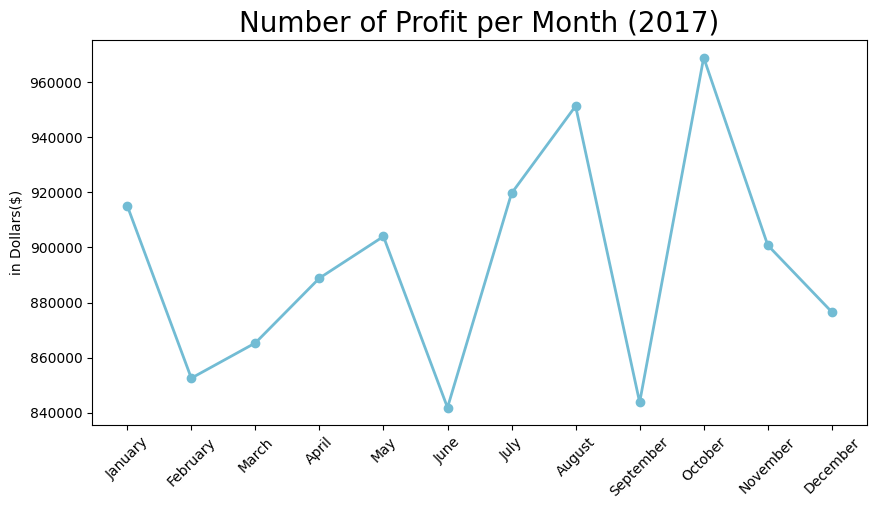

In [ ]:
monthly_profit_df = all_df.resample(rule='M', on='transaction_date').agg({
    'transaction_id':'nunique',
    'profit':'sum'
})

monthly_profit_df.index = monthly_profit_df.index.strftime('%B')
monthly_profit_df = monthly_profit_df.reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_profit_df['transaction_date'], monthly_profit_df['profit'], marker='o', linewidth=2, color='#72BCD4')
plt.title('Number of Profit per Month (2017)', loc='center', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.ylabel('in Dollars($)')
plt.show()

## **Sales by Age Segmentation and Gender**

In [ ]:
sales_age_gender_df = all_df.groupby(by=['age_category', 'gender']).agg({
    'transaction_id': 'nunique',
    'profit': 'sum'
})
sales_age_gender_df

transaction_id      profit
age_category gender                             
21-30        Female             1320   707881.99
             Male               1363   775971.37
31-40        Female             1681   936905.24
             Male               1660   913382.40
41-50        Female             3177  1718643.36
             Male               2986  1654287.31
51-60        Female             1963  1088418.71
             Male               1665   931176.88
61+          Female             1608   880257.16
             Male               1581   853263.80
             Unknown               8     4825.59

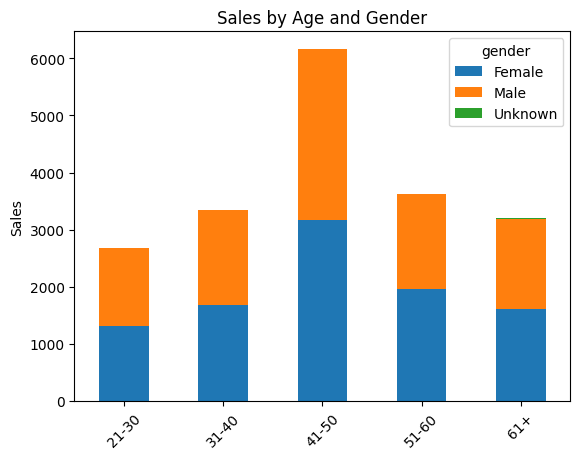

In [ ]:
grouped_df = sales_age_gender_df.groupby(['age_category', 'gender'])['transaction_id'].sum().unstack(fill_value=0)
ax = grouped_df.plot(kind='bar', stacked=True)
plt.title('Sales by Age and Gender')
plt.legend(title='gender')
plt.xlabel(None)
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

## **Top Industry of Customer's background**

In [ ]:
top_industry = all_df.groupby(by='job_industry_category').profit.sum().sort_values().reset_index()
top_industry

,job_industry_category,profit
0,Telecommunications,186662.44
1,Argiculture,300566.24
2,IT,377299.87
3,Entertainment,380207.91
4,Property,688763.64
5,Retail,963206.73
6,Health,1618904.50
7,Unknown,1736879.12
8,Financial Services,2095547.28
9,Manufacturing,2116976.08


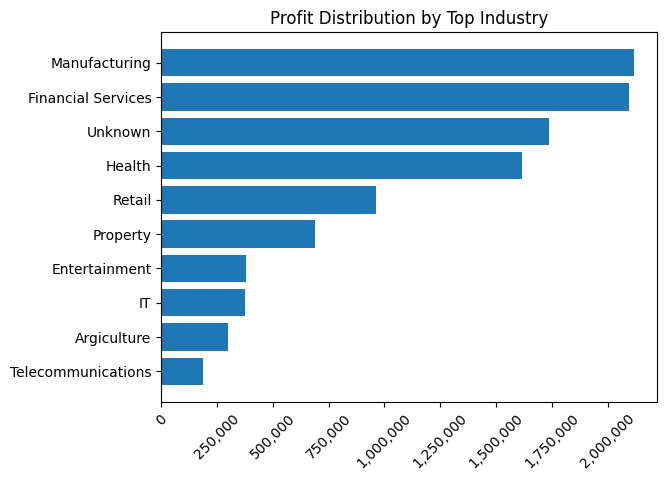

In [ ]:
def format_million(x, pos):
    return f'{x/1e6:.0f}M'

# Apply the formatter to the y-axis
formatter = StrMethodFormatter('{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.barh(y=top_industry['job_industry_category'], width=top_industry['profit'])
plt.title('Profit Distribution by Top Industry')
plt.xticks(rotation=45)
plt.show()

## **Order by Product Class**

In [ ]:
order_by_product_class = all_df.groupby(by='product_class').agg({
    'transaction_id': 'nunique',
    'profit': 'sum'
})

order_by_product_class = order_by_product_class.reset_index()
order_by_product_class.rename(columns={
    'transaction_id': 'order count',
}, inplace=True)

order_by_product_class

,product_class,order count,profit
0,high,2952,1091680.75
1,low,2906,1178490.49
2,medium,13587,8458645.09


Text(0.5, 1.0, 'Order by product Class')

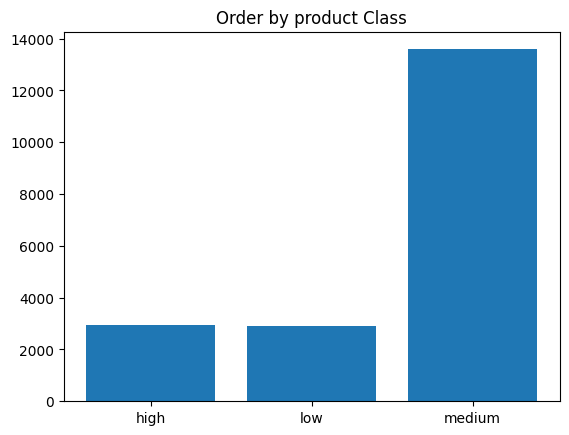

In [ ]:
plt.bar(x=order_by_product_class['product_class'],
        height=order_by_product_class['order count'])
plt.title('Order by product Class')

## **Owned car distribution by each state**

In [ ]:
owned_car = all_df.groupby(by=['state', 'owns_car']).agg({
    'customer_id': 'nunique',
    'profit': 'sum'
})

owned_car = owned_car.reset_index()
owned_car.rename(columns={
    'customer_id': 'customers'
}, inplace=True)

owned_car

,state,owns_car,customers,profit
0,NSW,No,888,2680598.36
1,NSW,Yes,934,2866019.91
2,QLD,No,366,1099774.63
3,QLD,Yes,363,1143915.21
4,VIC,No,435,1362948.84
5,VIC,Yes,425,1295572.38


Text(0.5, 1.0, 'Owned Car by State')

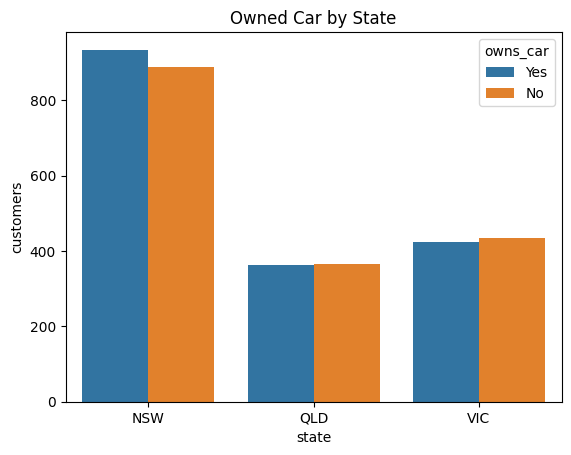

In [ ]:
import seaborn as sns

sns.barplot(x='state',
            y='customers',
            hue = 'owns_car',
            data = owned_car.sort_values(by='owns_car', ascending=False))
plt.title('Owned Car by State')

## **Profit by Wealth segment and owned car**

In [ ]:
profit_by_wealth = all_df.groupby(by='wealth_segment').agg({
    'customer_id': 'nunique',
    'profit': 'sum'
})

profit_by_wealth = profit_by_wealth.reset_index()
profit_by_wealth.rename(columns={
    'customer_id': 'customers'
}, inplace=True)

profit_by_wealth

,wealth_segment,customers,profit
0,Affluent Customer,838,2567813.04
1,High Net Worth,873,2669697.30
2,Mass Customer,1704,5227503.47


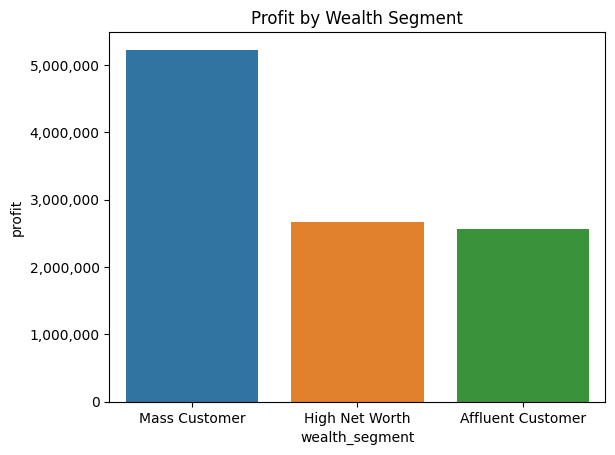

In [ ]:


sns.barplot(x='wealth_segment',
            y='profit',
            data = profit_by_wealth.sort_values(by='wealth_segment',ascending=False))

def format_million(x, pos):
    return f'{x/1e6:.0f}M'

# Apply the formatter to the y-axis
formatter = StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.title('Profit by Wealth Segment')
plt.show()

## **RFM analysis**

In [ ]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'transaction_date': 'max',
    'transaction_id':'nunique',
    'list_price': 'sum'
})

rfm_df.columns = ['customer_id', 'last_purchase_date', 'frequency', 'monetary']

#calculate the last purchase of date
recency_date = rfm_df['last_purchase_date'].max()
rfm_df['recency'] = rfm_df['last_purchase_date'].apply(lambda x: (recency_date - x). days)
rfm_df.drop('last_purchase_date', axis=1, inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency
0,1,11,9084.45,7
1,2,3,4149.07,128
2,3,7,9525.22,102
3,4,2,1047.72,195
4,5,6,5903.20,16


In [ ]:
rfm_df['R'] = pd.qcut(rfm_df['recency'], 5, labels=[5,4,3,2,1])
rfm_df['F'] = pd.qcut(rfm_df['frequency'], 5, labels=[1,2,3,4,5])
rfm_df['M'] = pd.qcut(rfm_df['monetary'], 5, labels=[1,2,3,4,5])

rfm_df['RFM_scores'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
rfm_df

,customer_id,frequency,monetary,recency,R,F,M,RFM_scores
0,1,11,9084.45,7,5,5,5,555
1,2,3,4149.07,128,1,1,2,112
2,3,7,9525.22,102,2,4,5,245
3,4,2,1047.72,195,1,1,1,111
4,5,6,5903.20,16,4,3,3,433
...,...,...,...,...,...,...,...,...
3487,3497,3,3744.07,52,3,1,2,312
3488,3498,6,5177.06,127,1,3,3,133
3489,3499,7,7673.48,51,3,4,4,344
3490,3500,6,4922.41,144,1,3,2,132


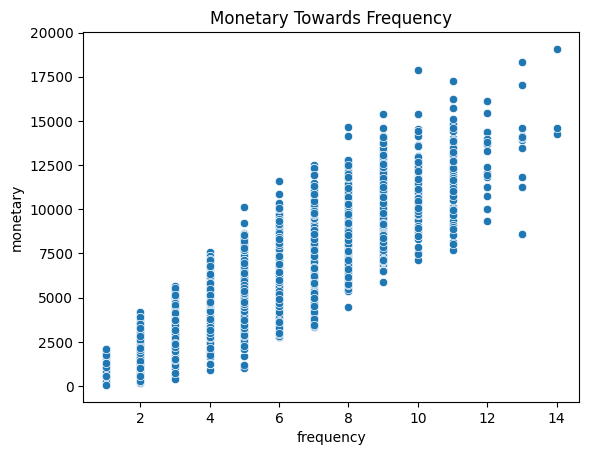

In [ ]:
sns.scatterplot(data = rfm_df,
                x='frequency',
                y='monetary')
plt.title('Monetary Towards Frequency')
plt.show()

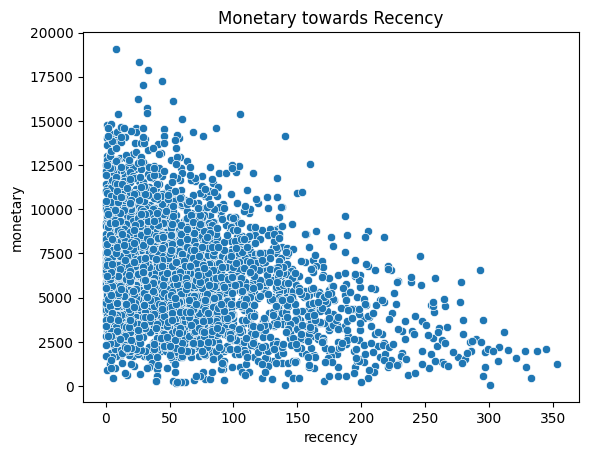

In [ ]:
sns.scatterplot(data = rfm_df,
                x= 'recency',
                y='monetary')
plt.title('Monetary towards Recency')
plt.show()

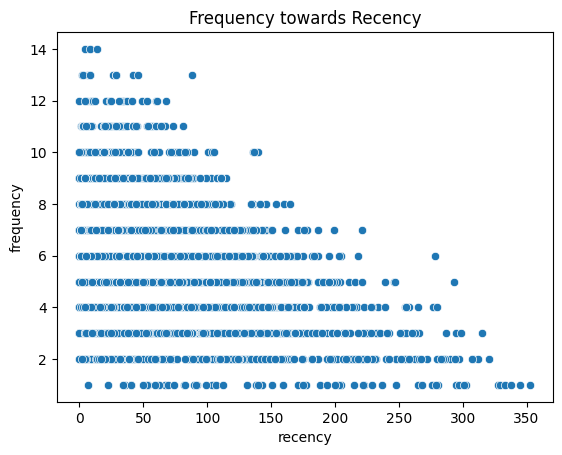

In [ ]:
sns.scatterplot(data=rfm_df,
                x = 'recency',
                y= 'frequency')
plt.title('Frequency towards Recency')
plt.show()

## **Customer Segmentation based on RFM Analysis**

In [ ]:
cust_segmentation = {
    r'11': 'Lost',
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'Can not Lose',
    r'[1-2]5': 'At Risk',
    r'3[1-2]': 'About to Sleep',
    r'3[3-5]': 'Need Attention',
    r'4[1-5]': 'Promising',
    r'5[1-2]': 'New Customers',
    r'53': 'Potential Loyalist',
    r'54': 'Loyal Customers',
    r'55': 'Champions'
}

In [ ]:
rfm_df['segment'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str)
rfm_df['segment'] = rfm_df['segment'].replace(cust_segmentation, regex=True)
rfm_df

,customer_id,frequency,monetary,recency,R,F,M,RFM_scores,segment
0,1,11,9084.45,7,5,5,5,555,Champions
1,2,3,4149.07,128,1,1,2,112,Lost
2,3,7,9525.22,102,2,4,5,245,Can not Lose
3,4,2,1047.72,195,1,1,1,111,Lost
4,5,6,5903.20,16,4,3,3,433,Promising
...,...,...,...,...,...,...,...,...,...
3487,3497,3,3744.07,52,3,1,2,312,About to Sleep
3488,3498,6,5177.06,127,1,3,3,133,Can not Lose
3489,3499,7,7673.48,51,3,4,4,344,Need Attention
3490,3500,6,4922.41,144,1,3,2,132,Can not Lose


In [ ]:
rank_cust = {
    r'Lost' : '11',
    r'Hibernating': '10',
    r'Can not Lose': '9',
    r'At Risk': '8',
    r'About to Sleep': '7',
    r'Need Attention': '6',
    r'Promising': '5',
    r'New Customers': '4',
    r'Potential Loyalist': '3',
    r'Loyal Customers': '2',
    r'Champions' : '1'
}

rfm_df['rank'] = rfm_df['segment'].replace(rank_cust, regex=True)
rfm_df

,customer_id,frequency,monetary,recency,R,F,M,RFM_scores,segment,rank
0,1,11,9084.45,7,5,5,5,555,Champions,1
1,2,3,4149.07,128,1,1,2,112,Lost,11
2,3,7,9525.22,102,2,4,5,245,Can not Lose,9
3,4,2,1047.72,195,1,1,1,111,Lost,11
4,5,6,5903.20,16,4,3,3,433,Promising,5
...,...,...,...,...,...,...,...,...,...,...
3487,3497,3,3744.07,52,3,1,2,312,About to Sleep,7
3488,3498,6,5177.06,127,1,3,3,133,Can not Lose,9
3489,3499,7,7673.48,51,3,4,4,344,Need Attention,6
3490,3500,6,4922.41,144,1,3,2,132,Can not Lose,9


In [ ]:
!pip install xlsxwriter
file_path = '/content/drive/MyDrive/Internship/KPMG_rfm_analysis.xlsx'

with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:
  rfm_df.to_excel(writer, sheet_name='RFM', index=False)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 3.0 MB/s eta 0:00:00


In [ ]:
rfm_df['rank'] = pd.to_numeric(rfm_df['rank'])
cust_classification = rfm_df.groupby(by=['rank','segment']).agg({
  'customer_id': 'nunique'}, inplace=True).sort_values(by='rank', ascending=True)

cust_classification = cust_classification.reset_index()
cust_classification.rename(columns={
    'customer_id': 'customers'
}, inplace=True)

cust_classification

,rank,segment,customers
0,1,Champions,212
1,2,Loyal Customers,113
2,3,Potential Loyalist,125
3,4,New Customers,288
4,5,Promising,668
5,6,Need Attention,391
6,7,About to Sleep,303
7,8,At Risk,133
8,9,Can not Lose,328
9,10,Hibernating,514


Text(0.5, 1.0, 'Customers Segmentation Based on RFM Analysis')

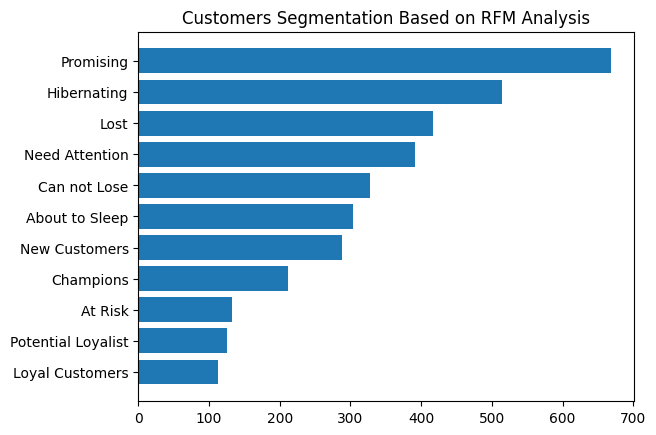

In [ ]:
cust_classification.sort_values(by='customers', inplace=True)
plt.barh(y= cust_classification['segment'],
        width= cust_classification['customers'])
plt.title('Customers Segmentation Based on RFM Analysis')

# **Targeted new Customers**

In [ ]:
new_cust = pd.read_excel('/content/drive/MyDrive/Internship/KPMG_cleaned_version.xlsx', sheet_name='NewCustomerList')

In [ ]:
new_cust

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_category
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,66,61+
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53,51-60
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,49,41-50
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44,41-50
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,58,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,64,61+
979,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,22,21-30
980,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,69,61+
981,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,70,61+


In [ ]:
targeted_cust= new_cust[(new_cust['gender'].isin(['Female', 'Male'])) &
                (new_cust['job_industry_category'].isin(['Manufacturing','Financial Services','Health'])) &
                (new_cust['age_category'] == '41-50') &
                (new_cust['owns_car'] == 'No') &
                (new_cust['wealth_segment'] == 'Mass Customer') &
                (new_cust['state'].isin(['NSW','VIC']))
               ]

In [ ]:
result = targeted_cust[[
                'first_name',
                'age',
                'owns_car',
                'wealth_segment',
                'state',
                'job_industry_category',
                'past_3_years_bike_related_purchases']]
result.sort_values(by='past_3_years_bike_related_purchases', ascending=False)

,first_name,age,owns_car,wealth_segment,state,job_industry_category,past_3_years_bike_related_purchases
270,Theresa,47,No,Mass Customer,NSW,Manufacturing,99
248,Sunny,48,No,Mass Customer,NSW,Financial Services,90
17,Winnifred,47,No,Mass Customer,VIC,Financial Services,83
789,Darlleen,43,No,Mass Customer,NSW,Health,77
37,Mitchell,44,No,Mass Customer,VIC,Manufacturing,58
164,Robert,47,No,Mass Customer,NSW,Health,55
55,Martelle,42,No,Mass Customer,NSW,Manufacturing,52
894,Aleece,48,No,Mass Customer,NSW,Manufacturing,49
306,Loleta,42,No,Mass Customer,NSW,Health,45
13,Melba,46,No,Mass Customer,NSW,Health,38
